In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../data/train_xy.csv')
train.shape

(15000, 160)

In [3]:
test = pd.read_csv('../data/train_x.csv')
test.shape

(10000, 159)

In [4]:
x_train = train.drop(['cust_id','cust_group','y'],axis=1)
x_train.shape

(15000, 157)

In [5]:
x_test = test.drop(['cust_id','cust_group'],axis=1)
x_test.shape

(10000, 157)

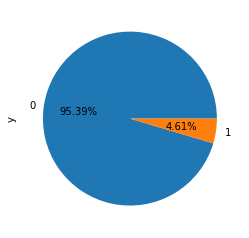

In [6]:
train['y'].value_counts().plot.pie(autopct = '%1.2f%%')

In [7]:
x = pd.concat([x_train,x_test])
x.shape

(25000, 157)

In [8]:
Y_train = train['y']

In [9]:
for i in range(96,158):
    col = 'x'+'_'+str(i)
    if col in x.columns.values:
        dummies_df = pd.get_dummies(x[col]).rename(columns=lambda x: col + str(x))
        x = pd.concat([x, dummies_df], axis=1)

In [10]:
train_X = x[0:15000]
test_X = x[15000:25000]
print(train_X.shape)
print(test_X.shape)

(15000, 361)
(10000, 361)


In [41]:
from sklearn.svm import SVC
from sklearn import metrics  #accuracy_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.svm import LinearSVC
from sklearn import linear_model
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from keras.models import Model
from keras.layers import Dense, Input

Using TensorFlow backend.


In [123]:
encoding_dim = 200
input_dim = Input(shape=(361,))

encoded = Dense(361, activation='linear')(input_dim)
# encoded = Dense(300, activation='relu')(encoded)
# encoded = Dense(32, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)

decoded = Dense(200, activation='relu')(encoder_output)
# decoded = Dense(64, activation='relu')(decoded)
# decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(361, activation='tanh')(decoded)

autoencoder = Model(inputs=input_dim, outputs=decoded)

encoder = Model(inputs=input_dim, outputs=encoder_output)

autoencoder.compile(optimizer='adam', loss='mse')
# training
autoencoder.fit(train_X.values, train_X.values, epochs=50, batch_size=150, shuffle=True)

Epoch 1/50
15000/15000 [==============================] - 2s 139us/step - loss: 1630.7941
Epoch 2/50
15000/15000 [==============================] - 2s 113us/step - loss: 1629.4037
Epoch 3/50
15000/15000 [==============================] - 2s 112us/step - loss: 1629.2613
Epoch 4/50
15000/15000 [==============================] - 2s 115us/step - loss: 1629.2614
Epoch 5/50
15000/15000 [==============================] - 2s 113us/step - loss: 1629.2615
Epoch 6/50
15000/15000 [==============================] - 2s 114us/step - loss: 1629.2615
Epoch 7/50
15000/15000 [==============================] - 2s 118us/step - loss: 1629.2616
Epoch 8/50
15000/15000 [==============================] - 2s 116us/step - loss: 1629.2616
Epoch 9/50
15000/15000 [==============================] - 2s 115us/step - loss: 1629.2616
Epoch 10/50
15000/15000 [==============================] - 2s 116us/step - loss: 1629.2616
Epoch 11/50
15000/15000 [==============================] - 2s 118us/step - loss: 1629.2616
Epoch 12

In [135]:
new_train_feature = encoder.predict(train_X.values)
new_test_feature = encoder.predict(test_X.values)
print(new_train_feature.shape)
print(new_test_feature.shape)

(15000, 200)
(10000, 200)


In [145]:
train_x1 = train_X.iloc[0:5000,:]
train_x2 = train_X.iloc[5000:10000,:]
train_x3 = train_X.iloc[10000:15000,:]

train_y1 = Y_train[0:5000]
train_y2 = Y_train[5000:10000]
train_y3 = Y_train[10000:15000]

print(train_x1.shape,train_x2.shape,train_x3.shape)
print(train_y1.shape,train_y2.shape,train_y3.shape)

(5000, 361) (5000, 361) (5000, 361)
(5000,) (5000,) (5000,)


In [147]:
def SVM1(xTrain,yTrain,xTest):
    clf = SVC(C=20, kernel='rbf',class_weight='balanced').fit(xTrain, yTrain)
    print("SVM Mean Accuracy score = ",cross_val_score(clf,xTrain,yTrain).mean())
    yPredSVM = clf.predict(xTest)
    return clf,yPredSVM

In [149]:
clf_svm1,yPredSVM1 = SVM1(train_x1, train_y1, test_X)
np.sum(yPredSVM1)

SVM Mean Accuracy score =  0.9762007920674264


95

In [24]:
def SVM2(xTrain,yTrain,xTest):
    clf = SVC(C=100, kernel='rbf', class_weight='balanced').fit(xTrain, yTrain)
    print("SVM Mean Accuracy score = ",cross_val_score(clf,xTrain,yTrain).mean())
    yPredSVM = clf.predict(xTest)
    return clf,yPredSVM

In [25]:
clf_svm2,yPredSVM2= SVM2(train_x2, train_y2, test_X)
np.sum(yPredSVM2)

SVM Mean Accuracy score =  0.8504009882297251


In [27]:
def SVM3(xTrain,yTrain,xTest):
    clf = SVC(C=20, kernel='rbf', class_weight='balanced').fit(xTrain, yTrain)
    print("SVM Mean Accuracy score = ",cross_val_score(clf,xTrain,yTrain).mean())
    yPredSVM = clf.predict(xTest)
    return clf,yPredSVM

In [28]:
clf_svm3,yPredSVM3= SVM3(train_x3, train_y3, test_X)
np.sum(yPredSVM3)

SVM Mean Accuracy score =  0.9662002773514925


In [30]:
xTrain = train_X
yTrain = Y_train
count=0
for i in range(0,len(yPredSVM3)):
    if(yPredSVM3[i] == yPredSVM2[i]) and (yPredSVM3[i] == yPredSVM1[i]):
        count+=1                
print(count)
xTrainNew = np.ndarray(shape=(count,xTrain.shape[1]))
yTrainNew = np.ndarray(shape=(count))
xTestNew = np.ndarray(shape=(len(yPredSVM3)-count,xTrain.shape[1]))

j = 0
k = 0
count = 0
for i in range(0,len(yPredSVM3)):
    if(yPredSVM3[i] == yPredSVM2[i]) and (yPredSVM3[i] == yPredSVM1[i]):
        xTrainNew[j] = test_X.values[i]
        yTrainNew[j] = yPredSVM3[i]
        j += 1
        count += 1                
    else:
        xTestNew[k]=test_X.values[i]
        k += 1

print(count)


xTrainNew = np.concatenate((xTrainNew,xTrain.values))
yTrainNew = np.concatenate((yTrainNew,yTrain.values))

print(xTrainNew.shape)
print(yTrainNew.shape)

9034
9034
(24034, 361)
(24034,)


In [31]:
def SVM4(xTrain,yTrain,xTest):
    clf = SVC(C=20, kernel='rbf', class_weight='balanced').fit(xTrain, yTrain)
    print("SVM Mean Accuracy score = ",cross_val_score(clf,xTrain,yTrain).mean())
    yPredSVM = clf.predict(xTest)
    return clf,yPredSVM

In [32]:
clf_svm4,yPredSVM4= SVM4(xTrainNew, yTrainNew, test_X)

SVM Mean Accuracy score =  0.9479071296521285


In [33]:
np.sum(yPredSVM4)

420.0

In [36]:
# test_temp = test
# print(test_temp.shape)
# test_temp['y'] = yPredSVM4

In [37]:
# test_temp.to_csv('train_ssvm_xy.csv',index=False)

In [163]:
def XGB(xTrain,yTrain,xTest):
    xgb = XGBClassifier( n_estimators= 750, learning_rate=0.1, max_depth= 10, min_child_weight= 1, class_weight='balanced', gamma=0.9,
                        subsample=0.9, colsample_bytree=0.8, objective= 'binary:logistic', nthread= -1, scale_pos_weight=1).fit(xTrain,yTrain)
    print("XGB Mean Accuracy score = ",cross_val_score(xgb,xTrain,yTrain).mean())
    yPredXGB = xgb.predict(xTest)
    return xgb,yPredXGB

In [164]:
xgb,yPredXGB= XGB(new_train_feature, Y_train, new_test_feature)
print(np.sum(yPredXGB))

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


XGB Mean Accuracy score =  0.8416666654346665
88


C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [157]:
def LGB(xTrain,yTrain,xTest):
    lgb = LGBMClassifier(n_estimators=750,
                         learning_rate=0.1,
                         num_leaves=25,
                         class_weight='balanced',
                         colsample_bytree=0.9,
                         subsample=0.7,
                         max_depth=10,
                         reg_alpha=0.1,
                         reg_lambda=0.1,
                         min_split_gain=0.01,
                         min_child_weight=1).fit(xTrain,yTrain)
    print("LGB Mean Accuracy score = ",cross_val_score(lgb,xTrain,yTrain).mean())
    yPredLGB = lgb.predict(xTest)
    return lgb,yPredLGB

In [158]:
lgb,yPredLGB= LGB(new_train_feature, Y_train, new_test_feature)
print(np.sum(yPredLGB))

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


LGB Mean Accuracy score =  0.8201335853200101
444


C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [161]:
clf_svm5,yPredSVM5= SVM4(new_train_feature, Y_train, new_test_feature)
np.sum(yPredSVM5)

SVM Mean Accuracy score =  0.882266772090671


315

In [165]:
output = []
for i in range(0,len(new_test_feature)):
    count1 =0
    count0 =0
    if yPredSVM4[i] == 1:
        count1 += 2
    else:
        count0 += 2
    if yPredSVM5[i] == 1:
        count1 += 1 
    else:
        count0 += 1
    if yPredXGB[i] == 1:
        count1 += 1
    else:
        count0 += 1
    if yPredLGB[i] == 1:
        count1 += 1
    else:
        count0 += 1

    if count1 > count0 :
        output.append(1)
    else:
        output.append(0)
print(len(output))
print(np.sum(output))

10000
187


In [166]:
output1 = []
for i in range(0,len(new_test_feature)):
    if yPredSVM4[i] == 1 or yPredSVM5[i] == 1 or yPredXGB[i] == 1 or yPredLGB[i] ==1:
        output1.append(1)
    else:
        output1.append(0)
print(len(output1))
print(np.sum(output1))

10000
894


In [167]:
test_temp = test
print(test_temp.shape)
test_temp['y'] = output1

(10000, 160)


In [168]:
test_temp.to_csv('train_sssvm_s_xy.csv',index=False)

In [169]:
test_temp = test
print(test_temp.shape)
test_temp['y'] = output

(10000, 160)


In [170]:
test_temp.to_csv('train_sssvm_j_xy.csv',index=False)